# E 01 Read some data and look at it 

My approach to teach you python is by letting you *do* things. In this example you are going to be able to do a lot of things, quite fast. That doesn't mean that you'll *understand* what you did, but with this very first crash course I hope to give you a bit of the taste of how Python works.

## Get the data

The data files for our exercises are available on OLAT. 

Copy the file data_Zhadang.csv from the data folder on the course OLAT page to the same directory as your copy of this notebook.

**Q: Open the file with a text editor. What kind of file is it? What does "csv" stands for?**

## Read the data

To read and analyse the data, we are going to use a very powerful package called [pandas](http://pandas.pydata.org/). Pandas is one of the reason why scientists are moving to python. It is really cool, as I hope to be able to show you now. 

In [1]:
import pandas as pd  # pd is the short name for pandas. It's good to stick to it. 
# While we are at it, let's import some other things we might need later
%matplotlib inline
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library

In [2]:
# We are now using pandas to read the data out of the csv file
# The first argument to the function is a path to a file, the other arguments
# are called "keywords". They tell to pandas to do certain things
df = pd.read_csv('data/data_Zhadang.csv', index_col=0, parse_dates=True)

df is a new variable we just created. It the short name for "dataframe". A dataframe is a kind of table, a little bit like in excel. Let's simply print it:

In [3]:
df

,TEMP_2M
2010-10-02 00:00:00,-2.887
2010-10-02 01:00:00,-3.223
2010-10-02 02:00:00,-3.912
2010-10-02 03:00:00,-4.137
2010-10-02 04:00:00,-4.241
2010-10-02 05:00:00,-4.019
2010-10-02 06:00:00,-4.500
2010-10-02 07:00:00,-4.628
2010-10-02 08:00:00,-1.964
2010-10-02 09:00:00,1.189


The dataframe has one "column" (TEMP_2M) and an "index" (a timestamp). A dataframe has many useful functions, for example you can make a plot out of it:

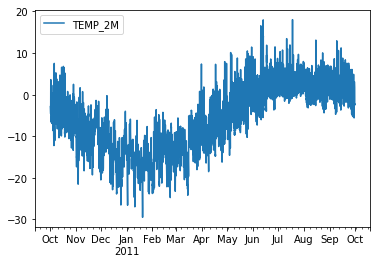

In [4]:
df.plot();

## Select parts of the data

Pandas is really good at *indexing* data. This means that it should be as easy as possible to select, for example, a specific day and plot it on a graph:

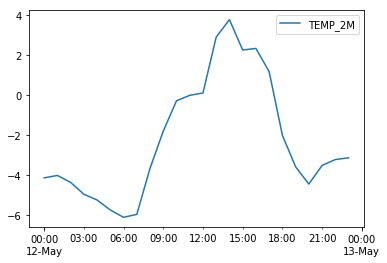

In [5]:
df_sel = df.loc['2011-05-12'] 
df_sel.plot();

**Q: Now select another day (for example July 1st 2011), and plot the data.**

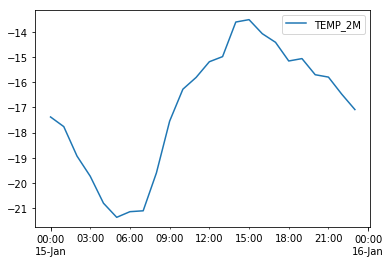

In [6]:
df_sel1 = df.loc['2011-01-15']
df_sel1.plot();

Note that you can also select specific range of time, for example the first week of July:

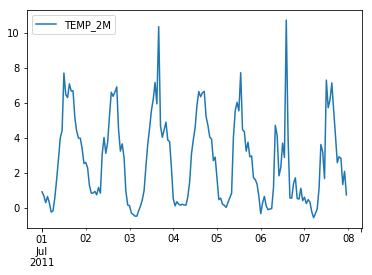

In [7]:
df.loc['2011-07-01':'2011-07-07'].plot();

Or the month of August:

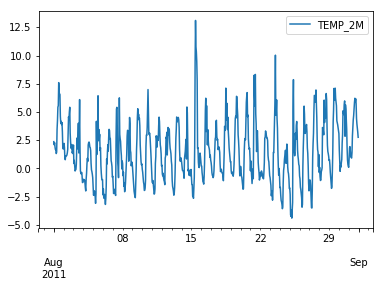

In [8]:
df.loc['2011-08'].plot();

## Computing averages

Pandas comes with very handy operations like "[resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)". Resample helps you to compute statistics over time. It's better explained with an example:

In [9]:
daily_mean = df.resample('D').mean()

**Q: Print the daily_mean variable. Plot it.**

             TEMP_2M
2010-10-02 -1.614833
2010-10-03 -3.131833
2010-10-04 -4.430042
2010-10-05 -7.388333
2010-10-06 -5.889375
2010-10-07 -5.982917
2010-10-08 -2.573500
2010-10-09 -3.002292
2010-10-10 -3.163042
2010-10-11 -3.009583
2010-10-12 -3.715958
2010-10-13 -4.165542
2010-10-14 -6.741292
2010-10-15 -4.493833
2010-10-16 -4.482417
2010-10-17 -4.030292
2010-10-18 -5.375292
2010-10-19 -5.617167
2010-10-20 -6.342292
2010-10-21 -5.235500
2010-10-22 -4.144708
2010-10-23 -4.530125
2010-10-24 -5.209958
2010-10-25 -5.232542
2010-10-26 -6.452833
2010-10-27 -7.818042
2010-10-28 -9.465750
2010-10-29 -7.191750
2010-10-30 -5.038625
2010-10-31 -6.213708
...              ...
2011-09-01  3.492458
2011-09-02  3.256625
2011-09-03  2.812875
2011-09-04  2.345667
2011-09-05  1.625125
2011-09-06  0.108917
2011-09-07 -0.279792
2011-09-08  0.476375
2011-09-09  3.164167
2011-09-10  1.958375
2011-09-11  0.635875
2011-09-12 -0.023208
2011-09-13 -1.167708
2011-09-14  2.208250
2011-09-15  2.446208
2011-09-16  3

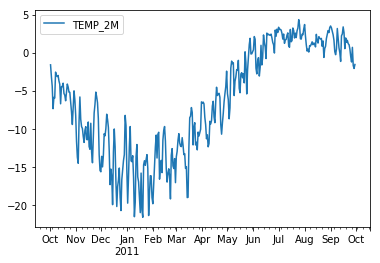

In [10]:
print(daily_mean)
daily_mean.plot();

**Q: Now try the functions df.resample('D').max() and df.resample('D').min(). What will they do? Plot them.**

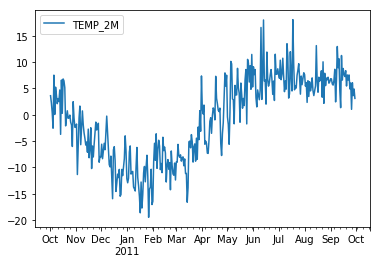

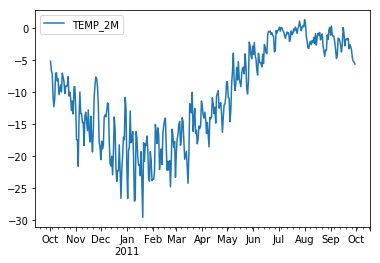

In [11]:
df.resample('D').max().plot();
df.resample('D').min().plot();

## Adding and selecting columns to dataframes

Columns in the dataframe can be created with the simple syntax:

In [12]:
daily_mean['TEMP_MAX'] = df.resample('D').max()
daily_mean['TEMP_MIN'] = df.resample('D').min()

**Q: Print the daily_mean dataframe. How many columns does it have? Plot it.**

             TEMP_2M  TEMP_MAX  TEMP_MIN
2010-10-02 -1.614833     3.608    -5.163
2010-10-03 -3.131833     2.249    -6.659
2010-10-04 -4.430042     0.384    -7.111
2010-10-05 -7.388333    -2.556   -10.720
2010-10-06 -5.889375     7.507   -12.263
2010-10-07 -5.982917     0.049   -11.033
2010-10-08 -2.573500     5.229    -7.090
2010-10-09 -3.002292     3.761    -6.944
2010-10-10 -3.163042     2.088    -8.243
2010-10-11 -3.009583     3.063    -7.923
2010-10-12 -3.715958     2.506   -10.382
2010-10-13 -4.165542     4.695    -9.653
2010-10-14 -6.741292    -3.722    -8.872
2010-10-15 -4.493833     6.573    -9.948
2010-10-16 -4.482417     0.265    -7.014
2010-10-17 -4.030292     6.782    -7.617
2010-10-18 -5.375292     6.426    -8.332
2010-10-19 -5.617167     5.147   -10.212
2010-10-20 -6.342292    -2.114    -9.030
2010-10-21 -5.235500    -0.555    -9.108
2010-10-22 -4.144708     0.749    -8.954
2010-10-23 -4.530125    -0.678    -7.579
2010-10-24 -5.209958    -0.591   -10.588
2010-10-25 -5.23

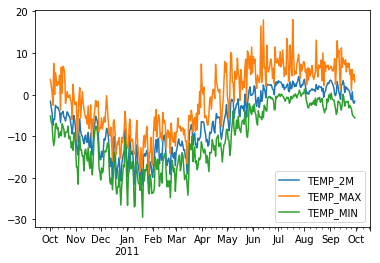

In [13]:
print(daily_mean)
# now it has 4 colums, including the minimum and maximum temperature!
daily_mean.plot();
# so the plot will include three temperature lines

It is easy to select a single column and, for example, plot it alone:

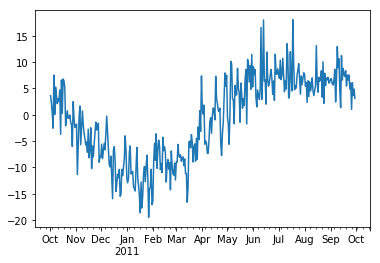

In [14]:
daily_mean['TEMP_MAX'].plot();

## Operations on columns

Operations on columns are just like normal array operations:

In [15]:
temp_range = daily_mean['TEMP_MAX'] - daily_mean['TEMP_MIN']

**Q: What is temp_range? Plot it. Add it to the daily_mean dataframe**

             TEMP_2M  TEMP_MAX  TEMP_MIN  TEMP_RANGE
2010-10-02 -1.614833     3.608    -5.163       8.771
2010-10-03 -3.131833     2.249    -6.659       8.908
2010-10-04 -4.430042     0.384    -7.111       7.495
2010-10-05 -7.388333    -2.556   -10.720       8.164
2010-10-06 -5.889375     7.507   -12.263      19.770
2010-10-07 -5.982917     0.049   -11.033      11.082
2010-10-08 -2.573500     5.229    -7.090      12.319
2010-10-09 -3.002292     3.761    -6.944      10.705
2010-10-10 -3.163042     2.088    -8.243      10.331
2010-10-11 -3.009583     3.063    -7.923      10.986
2010-10-12 -3.715958     2.506   -10.382      12.888
2010-10-13 -4.165542     4.695    -9.653      14.348
2010-10-14 -6.741292    -3.722    -8.872       5.150
2010-10-15 -4.493833     6.573    -9.948      16.521
2010-10-16 -4.482417     0.265    -7.014       7.279
2010-10-17 -4.030292     6.782    -7.617      14.399
2010-10-18 -5.375292     6.426    -8.332      14.758
2010-10-19 -5.617167     5.147   -10.212      

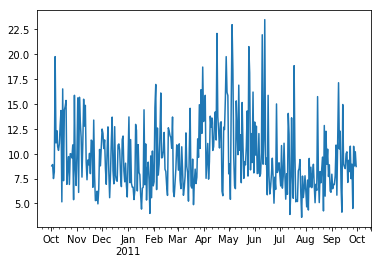

In [16]:
daily_mean ['TEMP_RANGE'] = temp_range
print(daily_mean)
temp_range.plot();

## Exercise: apply what you just learned

In the example above, we used resample with the argument 'D', for "daily frequency". The equivalent for monthly would be 'MS' (the "S" is for "start"). Could you repeat the operation above, but with monthly averages instead of daily averages?

              TEMP_2M  TEMP_MONTH_MAX  TEMP_MONTH_MIN  TEMP_RANGE
2010-10-01  -5.056112           7.507         -13.403      20.910
2010-11-01 -10.327746           1.647         -21.548      23.195
2010-12-01 -14.146203          -0.260         -26.560      26.300
2011-01-01 -16.432429          -5.913         -29.518      23.605
2011-02-01 -14.353031          -3.617         -24.775      21.158
2011-03-01 -11.775210           7.351         -24.207      31.558
2011-04-01  -7.753550           7.929         -18.528      26.457
2011-05-01  -2.714663          11.431         -14.602      26.033
2011-06-01   0.810142          17.965          -7.325      25.290
2011-07-01   2.394464          18.027          -2.084      20.111
2011-08-01   1.455454          13.105          -4.395      17.500
2011-09-01   1.023184          12.935          -5.610      18.545


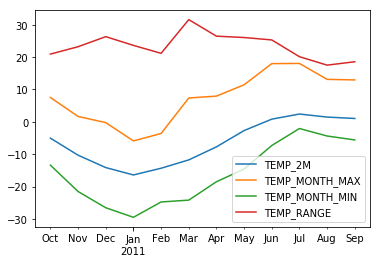

In [20]:
monthly_mean = df.resample('MS').mean()
monthly_mean['TEMP_MONTH_MAX'] = df.resample('MS').max()
monthly_mean['TEMP_MONTH_MIN'] = df.resample('MS').min()
monthly_mean['TEMP_RANGE'] = monthly_mean['TEMP_MONTH_MAX'] - monthly_mean['TEMP_MONTH_MIN']
print(monthly_mean) # see if it works correctly
monthly_mean.plot();

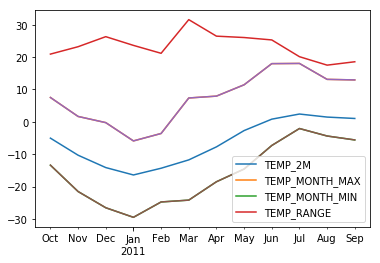

In [33]:
# note that its not necessary to plot series separately
monthly_mean.plot();
monthly_mean['TEMP_MONTH_MAX'].plot();
monthly_mean['TEMP_MONTH_MIN'].plot();
# look at behaviour of colours v legend here:

How could you plot two daily temperature cycles in the same figure? Have a go!

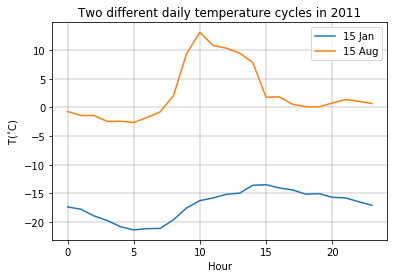

In [24]:
# make hour vector
hr = np.arange(0,24)
# plot data from 2 days together
plt.plot(hr,df.loc['2011-01-15', 'TEMP_2M'], label = '15 Jan');
plt.plot(hr,df.loc['2011-08-15', 'TEMP_2M'], label = '15 Aug');
# note how we can add legend items this way

# add some stuff to make the plot clearer
plt.ylabel('T($^{\circ}$C)');
plt.xlabel('Hour');
plt.legend(loc = 'best');
# do you like gridlines?
plt.grid(color = 'k', linestyle = '-', linewidth = 0.2);
# how about a title?
plt.title('Two different daily temperature cycles in 2011');

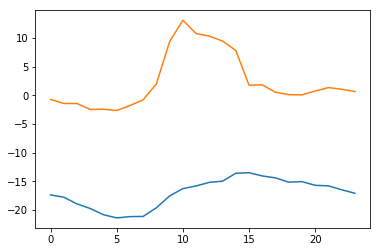

In [28]:
# can also extract hour from the pandas index
plt.plot(df.loc['2011-01-15'].index.hour,df.loc['2011-01-15', 'TEMP_2M'], label = '15 Jan');
plt.plot(df.loc['2011-01-15'].index.hour,df.loc['2011-08-15', 'TEMP_2M'], label = '15 Aug');

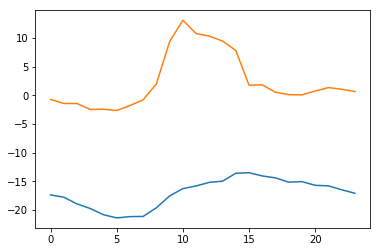

In [30]:
# or maybe its 'cleaner' this way?
jan_day = df.loc['2011-01-15']
aug_day = df.loc['2011-08-15']
plt.plot(jan_day.index.hour,jan_day['TEMP_2M'], label = '15 Jan');
plt.plot(aug_day.index.hour,aug_day['TEMP_2M'], label = '15 Aug');

To read more about pandas indexing and data selection conventions look here: https://pandas.pydata.org/pandas-docs/stable/indexing.html